In [78]:
"""
1. 시각적으로 표현할 분석 소주제 5개 이상 선정
2. 전처리(결측/이상/중복) 모두 처리 진행
    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인
3. 주제별 시각화 그래프 2개 이상
------------------------------------------------------------
4. 주제별 분석내용 작성 : 개인별로 작성
5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일
    - 제출 형식 : 모두 압축해서 : 본인이름.zip
    - 제출 위치 : 구글드라이브 > 3_산출물 > 1_심평원분석
6. 문제해결 : 조별로 스터지 하면서 해결
"""

'\n1. 시각적으로 표현할 분석 소주제 5개 이상 선정\n2. 전처리(결측/이상/중복) 모두 처리 진행\n    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인\n3. 주제별 시각화 그래프 2개 이상\n------------------------------------------------------------\n4. 주제별 분석내용 작성 : 개인별로 작성\n5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일\n    - 제출 형식 : 모두 압축해서 : 본인이름.zip\n    - 제출 위치 : 구글드라이브 > 3_산출물 > 1_심평원분석\n6. 문제해결 : 조별로 스터지 하면서 해결\n'

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 수술여부별

In [80]:
file_path = "./files_new/df_20TABLE_kor_명세서일반내역.xlsx"
df = pd.read_excel(file_path)
df

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [81]:
df_sur = df[['명세서 연결코드','성별구분코드', '수진자연령', '요양개시일자', 
             '수술여부','심결본인부담금','심결보험자부담금']]
df_sur

,명세서 연결코드,성별구분코드,수진자연령,요양개시일자,수술여부,심결본인부담금,심결보험자부담금
0,1,1,62,20130108,0,2800,6630
1,2,2,74,20130212,0,500,3880
2,3,1,14,20130222,0,1300,2010
3,4,1,68,20130608,0,7900,18760
4,5,1,19,20131128,0,2800,6630
...,...,...,...,...,...,...,...
5626,5627,2,9,20131001,0,3900,9410
5627,5628,1,20,20130423,0,3500,67810
5628,5629,1,4,20130112,0,2900,10920
5629,5630,2,47,20130401,0,2800,6630


In [82]:
df_sur['요양개시일자'] = df_sur['요양개시일자'].astype(str)

C:\Users\admin\AppData\Local\Temp\ipykernel_8512\3228331156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['요양개시일자'] = df_sur['요양개시일자'].astype(str)


In [83]:
df_sur['요양개시월'] = df_sur['요양개시일자'].str[4:6]

C:\Users\admin\AppData\Local\Temp\ipykernel_8512\1306861876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['요양개시월'] = df_sur['요양개시일자'].str[4:6]


In [84]:
year_list = ["09세이하", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대"]

df_sur_sort = pd.DataFrame()

num = 0

for i in range(0, len(year_list), 1) :    

    df_temp =  df_sur[(df_sur["수진자연령"] >= num) & (df_sur["수진자연령"] < num+10)]
    df_temp = df_temp.reset_index(drop=True)
    df_temp["연령대"] = year_list[i]
    df_sur_sort = pd.concat([df_sur_sort, df_temp], ignore_index=True)
    
    num += 10

df_sur_sort = df_sur_sort.reset_index(drop=True)
df_sur_sort

,명세서 연결코드,성별구분코드,수진자연령,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,요양개시월,연령대
0,7,1,3,20131211,0,2900,10930,12,09세이하
1,12,1,6,20130129,0,2800,6630,01,09세이하
2,21,1,3,20130130,0,2700,10260,01,09세이하
3,49,2,6,20130130,0,6500,9900,01,09세이하
4,55,1,6,20130502,0,2800,6630,05,09세이하
...,...,...,...,...,...,...,...,...,...
5626,2766,2,94,20130423,0,1500,11230,04,90대
5627,3303,2,94,20130709,0,1500,13450,07,90대
5628,4061,2,94,20131208,0,1500,11690,12,90대
5629,4600,2,94,20130401,0,1500,11770,04,90대


In [85]:
gender_list = ['남','여']

df_sur__gen_sort = pd.DataFrame()

for i in range(1, 3, 1) :    
    
    df_temp = df_sur_sort[df_sur_sort['성별구분코드'] == i]
    df_temp = df_temp.reset_index(drop=True)
    df_temp["성별"] = gender_list[i-1]
    df_sur__gen_sort = pd.concat([df_sur__gen_sort, df_temp], ignore_index=True)
    

df_sur__gen_sort = df_sur__gen_sort.reset_index(drop=True)
df_sur__gen_sort

,명세서 연결코드,성별구분코드,수진자연령,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,요양개시월,연령대,성별
0,7,1,3,20131211,0,2900,10930,12,09세이하,남
1,12,1,6,20130129,0,2800,6630,01,09세이하,남
2,21,1,3,20130130,0,2700,10260,01,09세이하,남
3,55,1,6,20130502,0,2800,6630,05,09세이하,남
4,79,1,3,20130315,0,2000,7680,03,09세이하,남
...,...,...,...,...,...,...,...,...,...,...
5626,2766,2,94,20130423,0,1500,11230,04,90대,여
5627,3303,2,94,20130709,0,1500,13450,07,90대,여
5628,4061,2,94,20131208,0,1500,11690,12,90대,여
5629,4600,2,94,20130401,0,1500,11770,04,90대,여


In [86]:
df_sur__gen_sort['수술여부'] = df_sur__gen_sort['수술여부'] / 9

In [87]:
df_sur__gen_sort = df_sur__gen_sort[['명세서 연결코드','성별','수술여부','심결본인부담금',
                           '심결보험자부담금','요양개시월','연령대']]
df_sur__gen_sort

,명세서 연결코드,성별,수술여부,심결본인부담금,심결보험자부담금,요양개시월,연령대
0,7,남,0.0,2900,10930,12,09세이하
1,12,남,0.0,2800,6630,01,09세이하
2,21,남,0.0,2700,10260,01,09세이하
3,55,남,0.0,2800,6630,05,09세이하
4,79,남,0.0,2000,7680,03,09세이하
...,...,...,...,...,...,...,...
5626,2766,여,0.0,1500,11230,04,90대
5627,3303,여,0.0,1500,13450,07,90대
5628,4061,여,0.0,1500,11690,12,90대
5629,4600,여,0.0,1500,11770,04,90대


In [88]:
df_sur__gen_sort.to_excel("./files_new/surgery.xlsx")

In [89]:
# 데이터 분석
### 나이별 성별 월별 수술여부 현황

In [90]:
df_sur__gen_sort.groupby('요양개시월')['수술여부'].sum()

요양개시월
01    13.0
02     5.0
03    10.0
04     4.0
05    15.0
06     7.0
07     8.0
08     7.0
09     8.0
10    14.0
11    13.0
12    13.0
Name: 수술여부, dtype: float64

In [91]:
df_sur_study = pd.pivot_table(df_sur__gen_sort, 
                              index   = '연령대',
                              columns = '성별',
                              values  = '수술여부',
                              aggfunc = 'sum')
df_sur_study = df_sur_study.fillna(0)
df_sur_study

성별,남,여
연령대,,
09세이하,8.0,5.0
10대,5.0,4.0
20대,5.0,4.0
30대,4.0,4.0
40대,12.0,6.0
50대,14.0,7.0
60대,12.0,9.0
70대,13.0,2.0
80대,1.0,2.0


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, '수술 횟수')

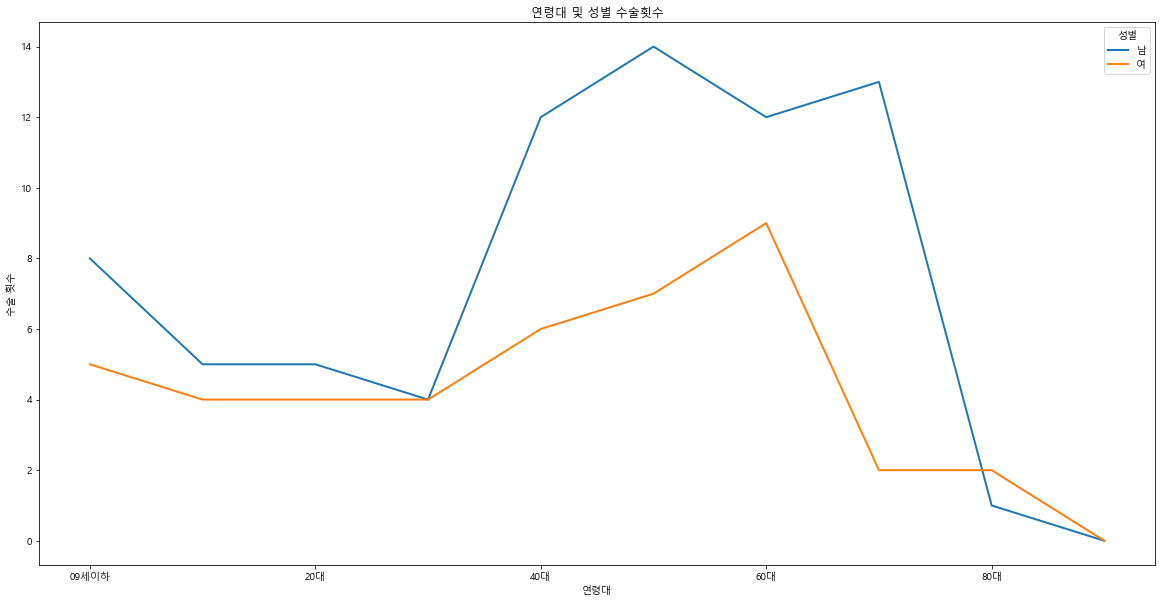

In [93]:
df_sur_study.plot()
plt.rc('font', family='Malgun Gothic')
plt.title('연령대 및 성별 수술횟수')
plt.ylabel('수술 횟수')

In [115]:
df_sur_pay = pd.pivot_table(df_sur__gen_sort, 
                              index   = '연령대',
                              columns = '성별',
                              values  = '심결본인부담금',
                              aggfunc = 'sum')
df_sur_pay = df_sur_pay.fillna(0)
df_sur_pay

성별,남,여
연령대,,
09세이하,1443100.0,1752660.0
10대,1520850.0,888730.0
20대,2660310.0,1302600.0
30대,1119600.0,1975190.0
40대,5270600.0,2511000.0
50대,7867090.0,2650000.0
60대,3398200.0,12899090.0
70대,3749870.0,8795380.0
80대,346500.0,464100.0


Text(0, 0.5, '본인부담금액 합')

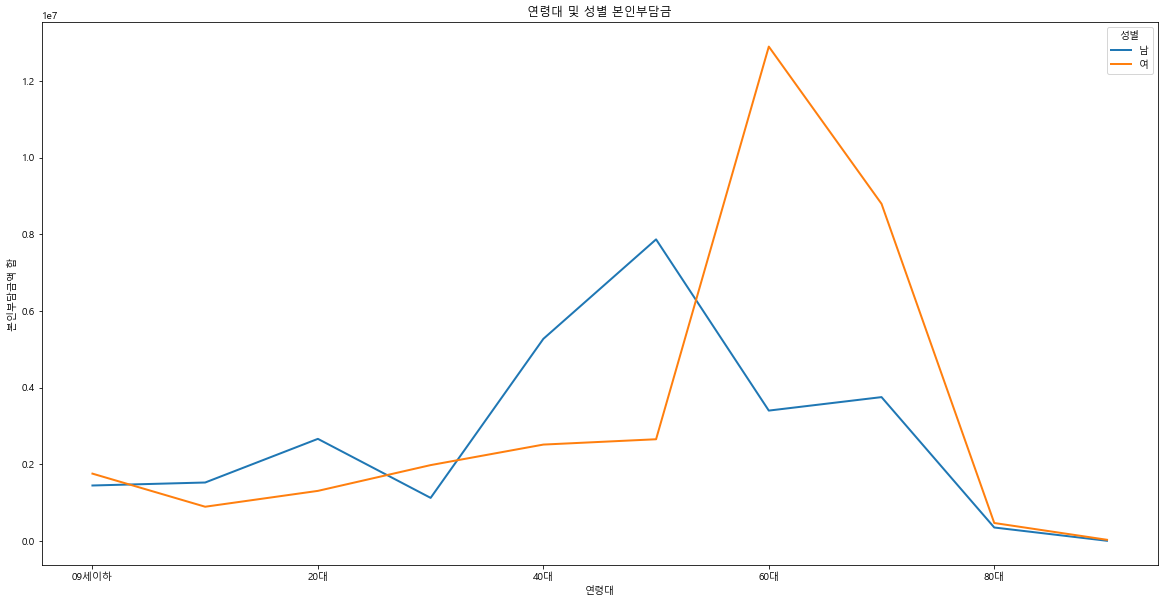

In [117]:
df_sur_pay.plot()
plt.rc('font', family='Malgun Gothic')
plt.title('연령대 및 성별 본인부담금')
plt.ylabel('본인부담금액 합')

In [ ]:
df_sur_pay = pd.pivot_table(df_sur__gen_sort, 
                              index   = '연령대',
                              columns = '성별',
                              values  = '심결본인부담금',
                              aggfunc = 'sum')
df_sur_pay = df_sur_pay.fillna(0)
df_sur_pay

In [95]:
import numpy as np

In [96]:
# 이상치 제거
q1, q3 = np.percentile(df_sur__gen_sort['심결본인부담금'], [25,75])
iqr = q3 - q1
df_sur_me = df_sur__gen_sort[((df_sur__gen_sort['심결본인부담금']) >= (q1 - 1.5*iqr)) & \
                                    ((df_sur__gen_sort['심결본인부담금']) <= (q3 + 1.5*iqr))]
df_sur_me

,명세서 연결코드,성별,수술여부,심결본인부담금,심결보험자부담금,요양개시월,연령대
0,7,남,0.0,2900,10930,12,09세이하
1,12,남,0.0,2800,6630,01,09세이하
2,21,남,0.0,2700,10260,01,09세이하
3,55,남,0.0,2800,6630,05,09세이하
4,79,남,0.0,2000,7680,03,09세이하
...,...,...,...,...,...,...,...
5626,2766,여,0.0,1500,11230,04,90대
5627,3303,여,0.0,1500,13450,07,90대
5628,4061,여,0.0,1500,11690,12,90대
5629,4600,여,0.0,1500,11770,04,90대


In [97]:
df_sur_me.groupby('수술여부')['심결본인부담금'].mean()

# 수술여부(0 : 수술안함, 1 : 수술)에 따라서 본인부담금의 평균이 약 1.9배정도 차이남

수술여부
0.0    3999.199918
1.0    7463.235294
Name: 심결본인부담금, dtype: float64

In [98]:
# 수술여부에 따른 보험사 부담금

In [99]:
# 이상치 제거
q1, q3 = np.percentile(df_sur__gen_sort['심결보험자부담금'], [25,75])
iqr = q3 - q1
df_sur_insur = df_sur__gen_sort[((df_sur__gen_sort['심결보험자부담금']) >= (q1 - 1.5*iqr)) & \
                                    ((df_sur__gen_sort['심결보험자부담금']) <= (q3 + 1.5*iqr))]
df_sur_insur

,명세서 연결코드,성별,수술여부,심결본인부담금,심결보험자부담금,요양개시월,연령대
0,7,남,0.0,2900,10930,12,09세이하
1,12,남,0.0,2800,6630,01,09세이하
2,21,남,0.0,2700,10260,01,09세이하
3,55,남,0.0,2800,6630,05,09세이하
4,79,남,0.0,2000,7680,03,09세이하
...,...,...,...,...,...,...,...
5626,2766,여,0.0,1500,11230,04,90대
5627,3303,여,0.0,1500,13450,07,90대
5628,4061,여,0.0,1500,11690,12,90대
5629,4600,여,0.0,1500,11770,04,90대


In [100]:
df_sur_insur.groupby('수술여부')['심결보험자부담금'].mean()

# 수술여부(0 : 수술안함, 1 : 수술)에 따라서 본인부담금의 평균이 약 1.7배정도 차이남

수술여부
0.0    10513.107995
1.0    18276.538462
Name: 심결보험자부담금, dtype: float64

### 진료과목코드별

In [101]:
file_path = "./files_new/df_20TABLE_kor_명세서일반내역.xlsx"
df20 = pd.read_excel(file_path)
df20

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [102]:
file_path = './files_new/표본자료 변수 테이블(2012-2013).xlsx'
df20_hcode = pd.read_excel(file_path, sheet_name = '표1.표2.표3.표4.', usecols='B,C', skiprows=[0,1], skipfooter=33)
df20_hcode.columns = ['진료과목코드','진료과목']
df20_hcode

,진료과목코드,진료과목
0,0,일반의
1,1,내과
2,2,신경과
3,3,정신과
4,4,외과
5,5,정형외과
6,6,신경외과
7,7,흉부외과
8,8,성형외과
9,9,마취통증의학과


In [106]:
df20_merge = pd.merge(df20,df20_hcode)
df20_merge

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,진료과목
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,9430,2800,6630,0,$,$,$,$,30796,내과
1,5,28,3,0,3,4,0.030001,33.332721,19,1,...,9430,2800,6630,0,$,$,$,$,4665,내과
2,12,115,3,0,3,2,0.030000,33.333011,6,1,...,9430,2800,6630,0,$,$,$,$,47527,내과
3,15,256,3,0,3,7,0.030000,33.333159,35,2,...,9430,2800,6630,0,$,$,$,$,23962,내과
4,18,267,3,0,3,11,0.030000,33.332969,53,1,...,34550,10300,24250,0,$,$,$,$,6437,내과
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,1907,261,3,0,3,6,0.030000,33.333097,28,2,...,24740,7400,17340,0,$,$,$,$,42889,영상의학과
5627,2921,312,3,0,3,14,0.030000,33.333333,69,2,...,9430,1500,7930,0,$,$,$,$,1158,영상의학과
5628,4975,218,3,0,3,9,0.030000,33.333021,41,1,...,60450,18100,42350,0,$,$,$,$,9975,영상의학과
5629,5566,312,3,0,3,14,0.030000,33.333333,69,2,...,0,0,0,0,$,$,$,$,1158,영상의학과


In [107]:
pivot_df20_merge_count = df20_merge.pivot_table(values="심결본인부담금",
                                                index="진료과목",
                                                columns="성별구분코드",
                                                aggfunc="count")
pivot_df20_merge_count = pivot_df20_merge_count.fillna(0)
pivot_df20_merge_count

성별구분코드,1,2
진료과목,,
가정의학과,121.0,120.0
구강내과,0.0,1.0
구강악안면외과,43.0,21.0
내과,986.0,822.0
마취통증의학과,18.0,136.0
비뇨기과,54.0,41.0
산부인과,4.0,104.0
성형외과,10.0,7.0
소아청소년과,235.0,233.0


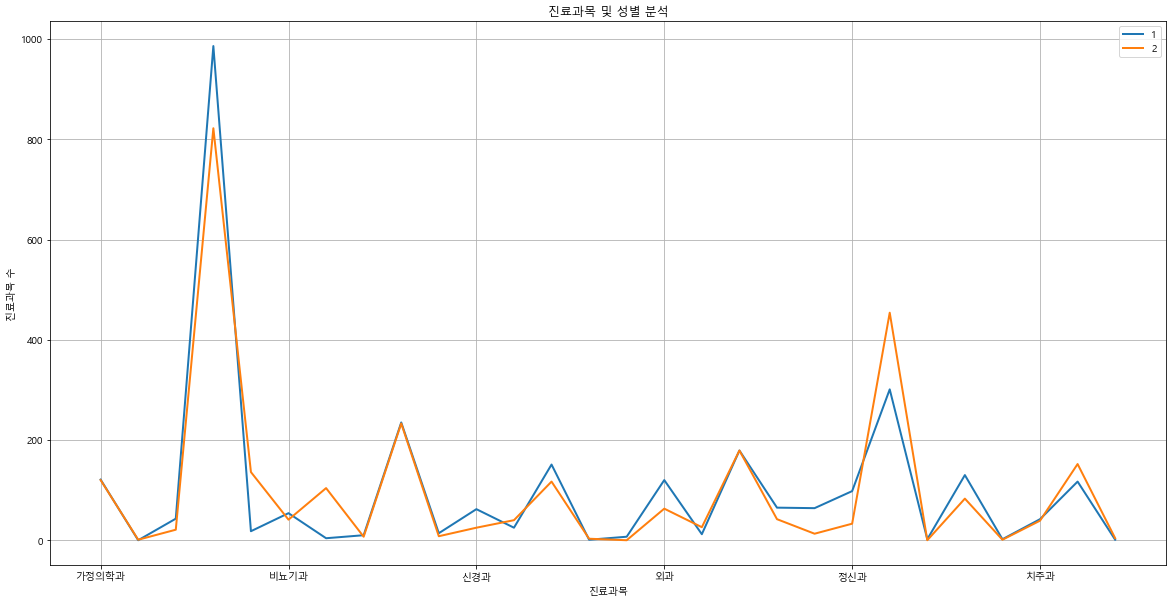

In [108]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rc("font", family = "Malgun Gothic", size=10)

pivot_df20_merge_count.plot()

plt.title("진료과목 및 성별 분석")
plt.ylabel("진료과목 수")

plt.legend(loc = "upper right")
plt.grid(True)
plt.show()

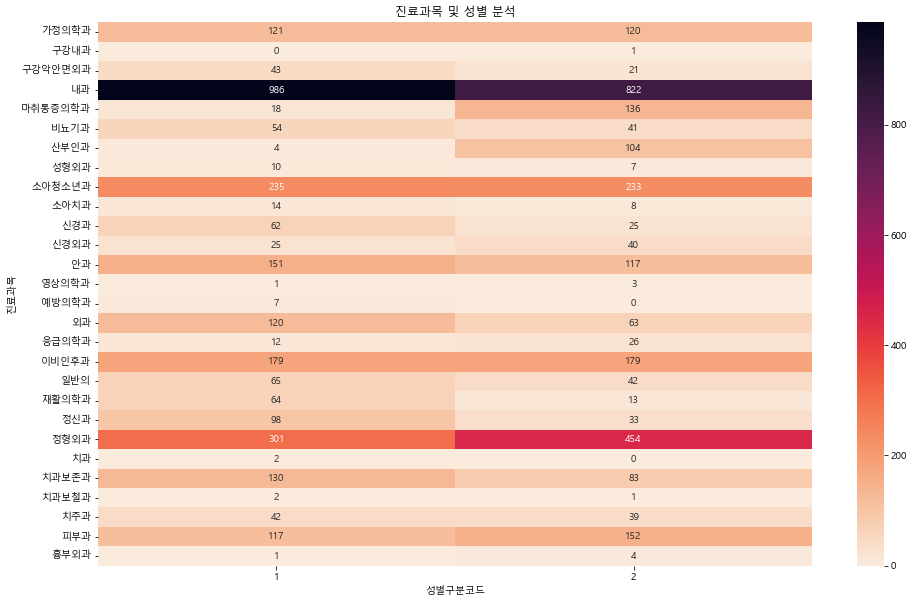

In [109]:
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df20_merge_count, annot=True, fmt=".0f", cmap="rocket_r")
plt.title("진료과목 및 성별 분석")
plt.show()

In [110]:
pivot_df20_merge_sum = df20_merge.pivot_table(values="심결본인부담금",
                                                index="진료과목",
                                                columns="성별구분코드",
                                                aggfunc="sum")
pivot_df20_merge_sum = pivot_df20_merge_sum.fillna(0)
pivot_df20_merge_sum

성별구분코드,1,2
진료과목,,
가정의학과,407100.0,705800.0
구강내과,0.0,3900.0
구강악안면외과,422400.0,211300.0
내과,9936280.0,5229630.0
마취통증의학과,198600.0,1241200.0
비뇨기과,561900.0,140600.0
산부인과,23400.0,786910.0
성형외과,182100.0,56700.0
소아청소년과,940700.0,1116540.0


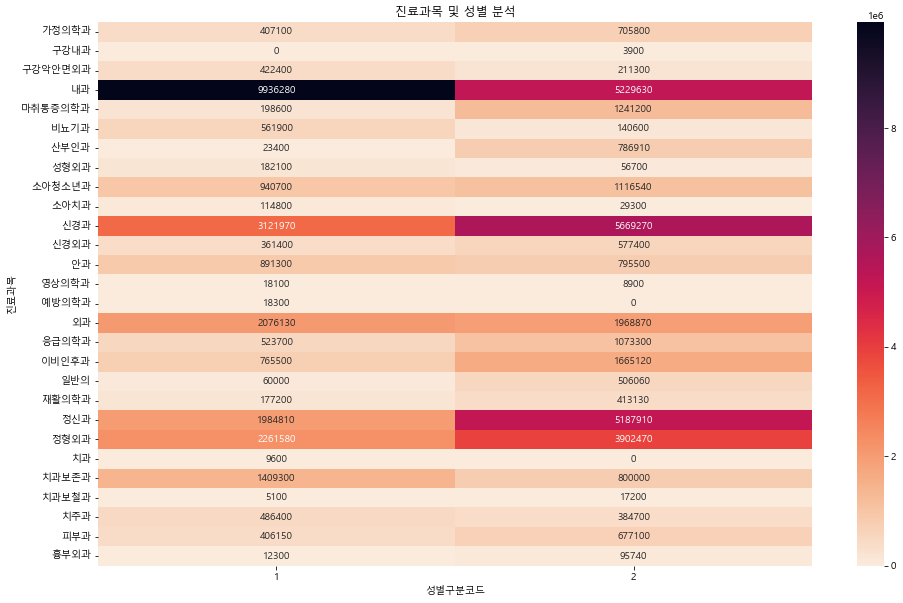

In [111]:
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df20_merge_sum, annot=True, fmt=".0f", cmap="rocket_r")
plt.title("진료과목 및 성별 분석")
plt.show()

<AxesSubplot:ylabel='Frequency'>

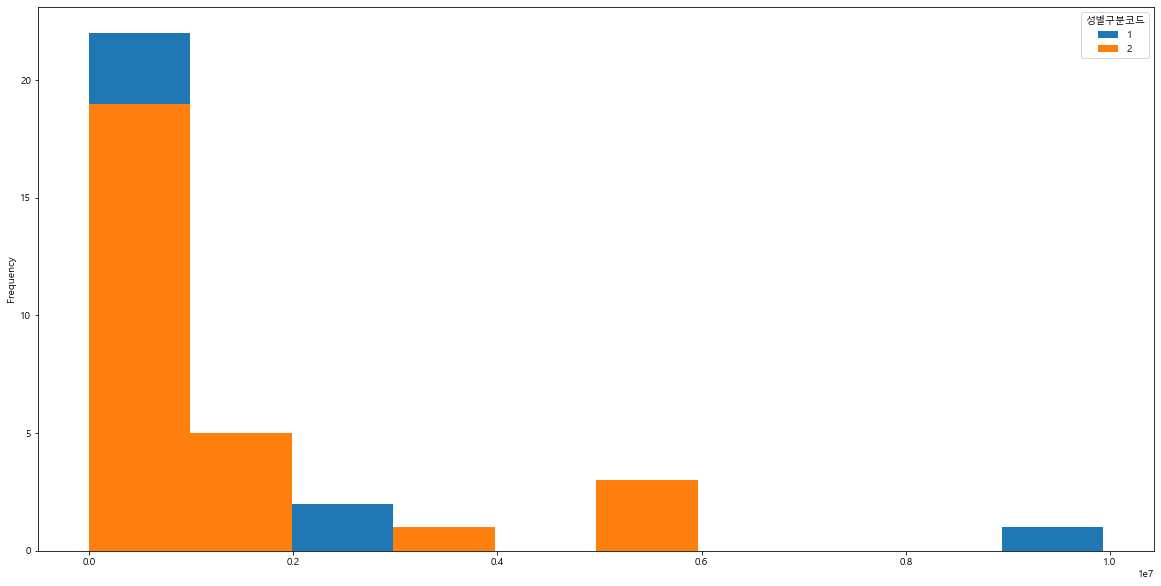

In [112]:
pivot_df20_merge_sum.plot(kind="hist")

<AxesSubplot:xlabel='심결본인부담금', ylabel='진료과목'>

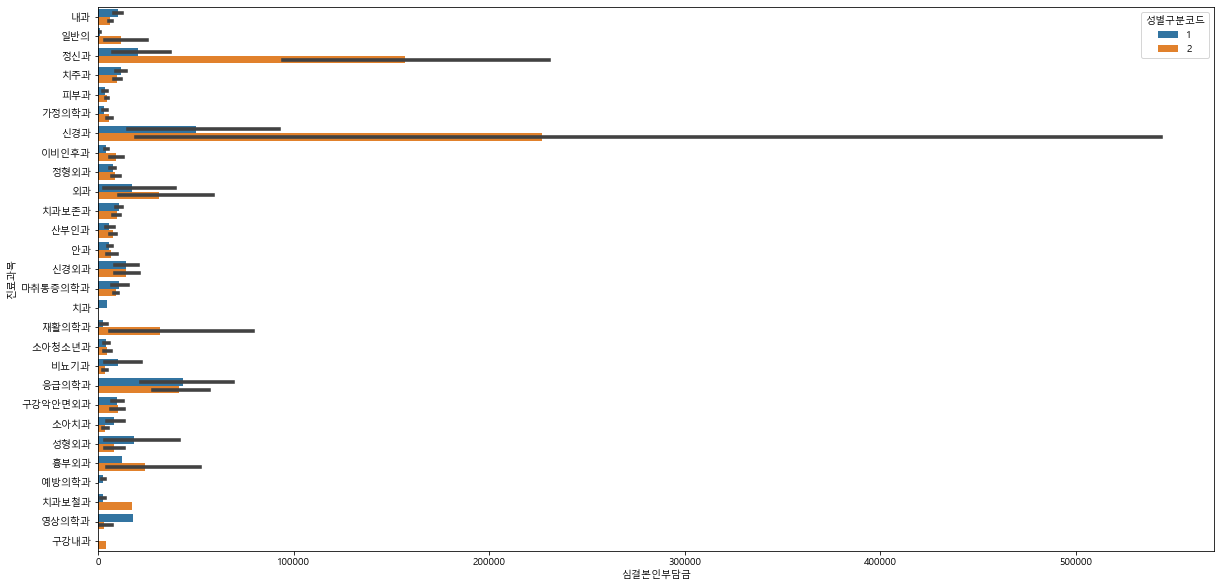

In [113]:
sns.barplot(x="심결본인부담금", y="진료과목", hue="성별구분코드", data=df20_merge)


### 주상병코드별 

In [ ]:
import pandas as pd
file_path = "./files_new/df_20TABLE_kor_명세서일반내역.xlsx"
df_20TABLE_org = pd.read_excel(file_path)
df_20TABLE_org

#  주상병코드
df_operation = df_20TABLE_org["주상병코드"]
df_operation.str[0:3]

file_path2 = "./files_new/주상병코드.xlsx"
df_code = pd.read_excel(file_path2)
df_code

,주상병코드st,주상병코드end,한국표준질병인사분류
0,A00,B99,특정 감염성 및 기생충성 질환
1,C00,D48,신생물
2,D50,D89,혈액 및 조혈기관의 질환과 면역메커니즘을 침범한 특정 장애
3,E00,E90,"내분비, 영양 및 대사 질환"
4,F00,F99,정신 및 행동 장애
5,G00,G99,신경계통의 질환
6,H00,H59,눈 및 눈 부속기의 질환
7,H60,H95,귀 및 유돌의 질환
8,I00,I99,순환계통의 질환
9,J00,J99,호흡계통의 질환
